In [1]:
import os, glob
import pandas as pd
import cv2 
from datetime import timedelta
import os
import numpy as np
%load_ext autoreload
%autoreload 2

In [ ]:
SAVING_FRAMES_PER_SECOND = 1

In [ ]:
def format_timedelta(td):
    """Utility function to format timedelta objects in a cool way (e.g 00:00:20.05) 
    omitting microseconds and retaining milliseconds"""
    result = str(td)
    try:
        result, ms = result.split(".")
    except ValueError:
        return result + ".00".replace(":", "-")
    ms = int(ms)
    ms = round(ms / 1e4)
    return f"{result}.{ms:02}".replace(":", "-")

In [ ]:
def get_saving_frames_durations(cap, saving_fps):
    """A function that returns the list of durations where to save the frames"""
    s = []
    # get the clip duration by dividing number of frames by the number of frames per second
    clip_duration = cap.get(cv2.CAP_PROP_FRAME_COUNT) / cap.get(cv2.CAP_PROP_FPS)
    # use np.arange() to make floating-point steps
    for i in np.arange(0, clip_duration, 1 / saving_fps):
        s.append(i)
    return s

In [ ]:
def main(video_file):
    filename, _ = os.path.splitext(video_file)
    filename += "-opencv"
    # make a folder by the name of the video file
    if not os.path.isdir(filename):
        os.mkdir(filename)
    # read the video file    
    cap = cv2.VideoCapture(video_file)
    # get the FPS of the video
    fps = cap.get(cv2.CAP_PROP_FPS)
    # if the SAVING_FRAMES_PER_SECOND is above video FPS, then set it to FPS (as maximum)
    saving_frames_per_second = min(fps, SAVING_FRAMES_PER_SECOND)
    # get the list of duration spots to save
    saving_frames_durations = get_saving_frames_durations(cap, saving_frames_per_second)
    # start the loop
    count = 0
    while True:
        is_read, frame = cap.read()
        if not is_read:
            # break out of the loop if there are no frames to read
            break
        # get the duration by dividing the frame count by the FPS
        frame_duration = count / fps
        try:
            # get the earliest duration to save
            closest_duration = saving_frames_durations[0]
        except IndexError:
            # the list is empty, all duration frames were saved
            break
        if frame_duration >= closest_duration:
            # if closest duration is less than or equals the frame duration, 
            # then save the frame
            frame_duration_formatted = format_timedelta(timedelta(seconds=frame_duration))
            cv2.imwrite(os.path.join(filename, f"frame{frame_duration_formatted}.jpg"), frame) 
            # drop the duration spot from the list, since this duration spot is already saved
            try:
                saving_frames_durations.pop(0)
            except IndexError:
                pass
        # increment the frame count
        count += 1

In [ ]:
main('/Users/julianlapique/code/2021-10-25 10-31-58 c27.flv')

In [50]:
#from IPython.display import Image
#Image(data=frame)

from IPython.display import Image
im = Image(filename='/Users/julianlapique/code/test.jpg') 

In [40]:
print(im)

<IPython.core.display.Image object>


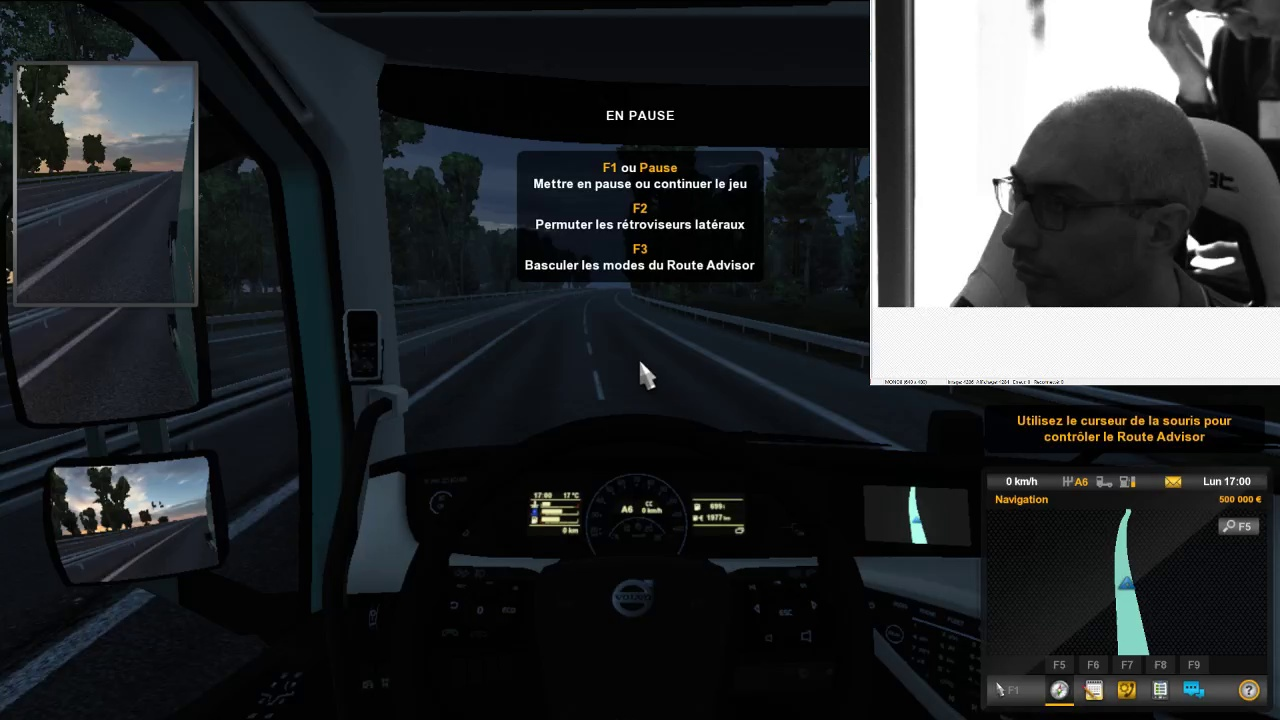

In [53]:
im

In [56]:
print(dir(im))

['_ACCEPTABLE_EMBEDDINGS', '_FMT_GIF', '_FMT_JPEG', '_FMT_PNG', '_MIMETYPES', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_check_data', '_data_and_metadata', '_find_ext', '_mimetype', '_read_flags', '_repr_html_', '_repr_jpeg_', '_repr_mimebundle_', '_repr_png_', '_retina_shape', '_show_mem_addr', 'alt', 'data', 'embed', 'filename', 'format', 'height', 'metadata', 'reload', 'retina', 'unconfined', 'url', 'width']


In [ ]:
#! pip install Pillow

In [2]:
from PIL import Image

In [ ]:
#im[0:100, 0:200].show()

In [54]:
left = 0
top = 50
right = 510
bottom = 292
 
  
img_res = im.crop((left, top, right, bottom)) 
 

#img_res.show() 

AttributeError: 'Image' object has no attribute 'crop'

In [ ]:
#! pip install pillow

In [ ]:
#!pip install --upgrade pip


In [ ]:
#!pip install --upgrade Pillow

In [ ]:
command += 'ffmpeg -i %s.mp4 -vf fps=25 ../frames/%s-%%02d.jpg;' % (f_name, f_name)



In [48]:
import matplotlib.pyplot as plt
# load image from file
filename = im
pixels = plt.imread(filename)
print("Shape of image/array:",pixels.shape)
imgplot = plt.imshow(pixels)
plt.show()

AttributeError: 'Image' object has no attribute 'read'

In [ ]:
detector = mtcnn.MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
for face in faces:
    print(face)

In [ ]:
im

In [ ]:
#im = Image.open("test.jpg")

crop_rectangle = (50, 50, 200, 200)
cropped_im = im.crop(crop_rectangle)

cropped_im.show()

In [ ]:
frame is None 

In [ ]:
cv2.imshow('frame', frame)

In [ ]:
#!pip install opencv-python

In [ ]:
#!pip install mtcnn

In [ ]:
from DDDS.drive import Drive

In [ ]:
drive = Drive()

In [ ]:
files_list = drive.list('flv')

In [ ]:
try:
    files_list.remove({'id': '12kalNd2raRQPitBsAmcf6kt1O9jnpcRL', 'name': '2022-01-07 14-02-27.flv'})
except:
    pass

In [ ]:
files_df = pd.DataFrame(files_list)

In [ ]:
files_df.head()

In [ ]:
first_video = files_df.iloc[0]

In [ ]:
first_video

In [ ]:
first_video_to_frame = drive.list('2021-10-28 15-04-13 1c3.flv')

In [ ]:
first_video_to_frame

In [ ]:
SAVING_FRAMES_PER_SECOND = 1

In [ ]:
capture = cv2.VideoCapture('/Users/julianlapique/code/Jackfn96/3DS/video/2021-10-25 10-31-58 c27.flv')



In [ ]:
success, frame = capture.read()

In [ ]:
frame is None 

In [ ]:
cv2.imshow('frame', frame)

In [ ]:
import cv2
vidcap = cv2.VideoCapture('/Users/julianlapique/code/Jackfn96/3DS/video/2021-10-25 10-31-58 c27.flv')
success,image = vidcap.read()
count = 0
while success:
  cv2.imwrite("frame%d.jpg" % count, image)     # save frame as JPEG file      
  success,image = vidcap.read()
  print('Read a new frame: ', success)
  count += 1

In [ ]:
frameNr = 0

while (True and frameNr < 50):
    success, frame = capture.read()
    if success:
        cv2.imwrite(f'/Users/julianlapique/code/Jackfn96/3DS/video/output/frame_{frameNr}.jpg', frame)
 
    else:
        break
 
    frameNr = frameNr+1
 
capture.release()

#cap = cv2.capture(0)


#cap2 = cv2.VideoCapture(0)

In [ ]:
from IPython.display import Image
Image(data=frame)

In [ ]:
frame[0:100, 0:200]